<a href="https://colab.research.google.com/github/mikful/dlai-tf-in-practice/blob/master/TensorFlow_in_Practice_Course_3_Week_3_Lesson_1a_Single_Layer_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Single Layer LSTM

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

import tensorflow_datasets as tfds

TensorFlow 2.x selected.
2.1.0


In [3]:
# Get the data - using Subwords version of imdb reviews for demonstration purposes of improvement with LSTM
# better performance found on non-subworded datasets

dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteVA9OD3/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteVA9OD3/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteVA9OD3/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [0]:
tokenizer = info.features['text'].encoder

In [0]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [0]:
# Bi-directional Single Layer LSTM

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 72s 183ms/step - loss: 0.5544 - accuracy: 0.7171 - val_loss: 0.6939 - val_accuracy: 0.5000
Epoch 2/10
391/391 [==============================] - 62s 160ms/step - loss: 0.6593 - accuracy: 0.5995 - val_loss: 0.6860 - val_accuracy: 0.5519
Epoch 3/10
391/391 [==============================] - 62s 159ms/step - loss: 0.5541 - accuracy: 0.7257 - val_loss: 0.6012 - val_accuracy: 0.6661
Epoch 4/10
391/391 [==============================] - 63s 160ms/step - loss: 0.3980 - accuracy: 0.8274 - val_loss: 0.4038 - val_accuracy: 0.8223
Epoch 5/10
391/391 [==============================] - 62s 160ms/step - loss: 0.2884 - accuracy: 0.8848 - val_loss: 0.7237 - val_accuracy: 0.6160
Epoch 6/10
391/391 [==============================] - 62s 159ms/step - loss: 0.2603 - accuracy: 0.8998 - val_loss: 0.3684 - val_accuracy: 0.8575
Epoch 7/10
391/391 [==============================] - 62s 159ms/step - loss: 0.1930 - accuracy: 0.9311 - val_loss: 0.3776 - val_ac

In [0]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

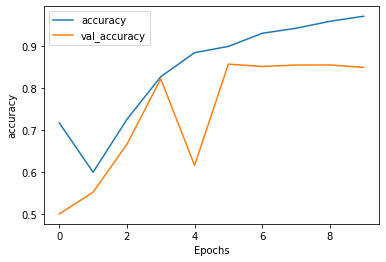

In [11]:
plot_graphs(history, 'accuracy')

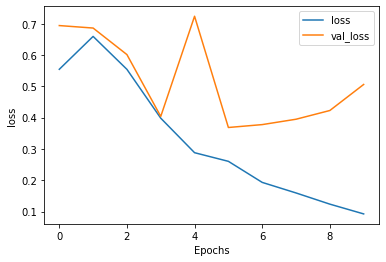

In [12]:
plot_graphs(history, 'loss')